# Ames Housing Data Cleaning and Organizing

***
## 1. Data Preparation before cleaning

### Libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Housing Data from csv file.

In [3]:
df = pd.read_csv('Ames_Housing_Data.csv')

### Opening data description.

In [4]:
with open("Ames_Housing_Feature_Description.txt", 'r') as file:
    filetext = file.read()
    print(filetext)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### First five values in DataFrame.

In [5]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Column datatypes info.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Basic stats in numerical columns.

In [7]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Checking if there are any missing values.

In [8]:
df.isnull().values.any()

True

### Selecting columns with missing values.

In [9]:
null_cols = df.isnull().sum() > 0
null_cols = null_cols[null_cols == True].index
df[null_cols]

,Lot Frontage,Alley,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,...,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Pool QC,Fence,Misc Feature
0,141.0,NaN,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,...,Attchd,1960.0,Fin,2.0,528.0,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,TA,TA,No,Rec,468.0,LwQ,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN
2,81.0,NaN,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,...,Attchd,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2
3,93.0,NaN,None,0.0,TA,TA,No,ALQ,1065.0,Unf,...,Attchd,1968.0,Fin,2.0,522.0,TA,TA,NaN,NaN,NaN
4,74.0,NaN,None,0.0,Gd,TA,No,GLQ,791.0,Unf,...,Attchd,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,NaN,None,0.0,TA,TA,Av,GLQ,819.0,Unf,...,Detchd,1984.0,Unf,2.0,588.0,TA,TA,NaN,GdPrv,NaN
2926,NaN,NaN,None,0.0,Gd,TA,Av,BLQ,301.0,ALQ,...,Attchd,1983.0,Unf,2.0,484.0,TA,TA,NaN,MnPrv,NaN
2927,62.0,NaN,None,0.0,Gd,TA,Av,GLQ,337.0,Unf,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed
2928,77.0,NaN,None,0.0,Gd,TA,Av,ALQ,1071.0,LwQ,...,Attchd,1975.0,RFn,2.0,418.0,TA,TA,NaN,NaN,NaN


### Checking how many missing values are in each column.

In [10]:
miss_val = df[null_cols].isnull()
miss_val.sum().sort_values()

Electrical           1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
dtype: int64

### Creating a function which counts percetnage of missing values in each column.

In [11]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
miss_val_percent = percent_missing(df)

### Barplot with percentage of missing values in each columns.

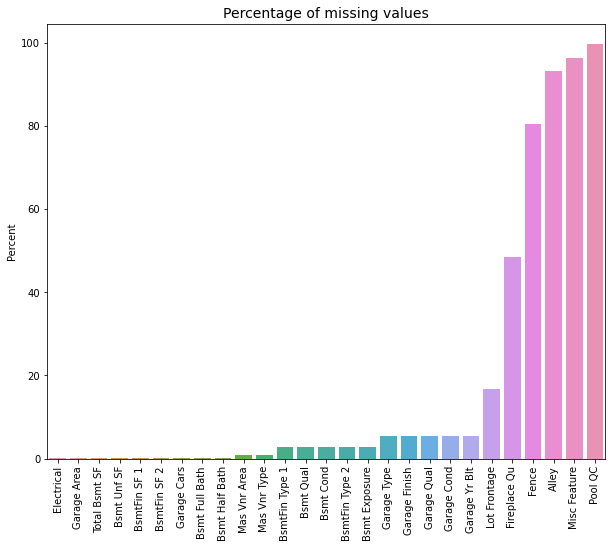

In [12]:
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values", fontsize=14)
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.ylabel("Percent")
plt.xticks(rotation=90);

### Checking column with low percentage < 1%.

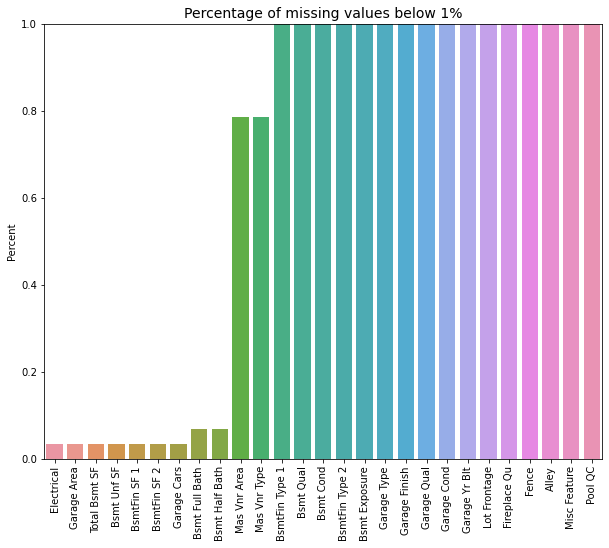

In [13]:
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values below 1%", fontsize=14)
plt.ylim(0,1)
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.ylabel("Percent")
plt.xticks(rotation=90);

***
## 2. Data Cleaning

### PID is the identifier for each column, as is the index, so we can remove it to avoid duplicating information

In [14]:
df = df.drop(columns='PID')

***
## *Electrical column*


### Checking rows with missing values in 'Electrical' column.

In [15]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


### We have only one row with missing Electrical data so we can drop it.

In [16]:
df = df.dropna(axis=0, subset=['Electrical'])

***
## *Basement columns*

### We can divide basement columns on numerical and string.

In [17]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']


### In the description is written that null value in these columns means no basement so we can fill it with 0 or 'none'.

In [18]:
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

***
##  *Missing values after cleaning electrical and basement columns*

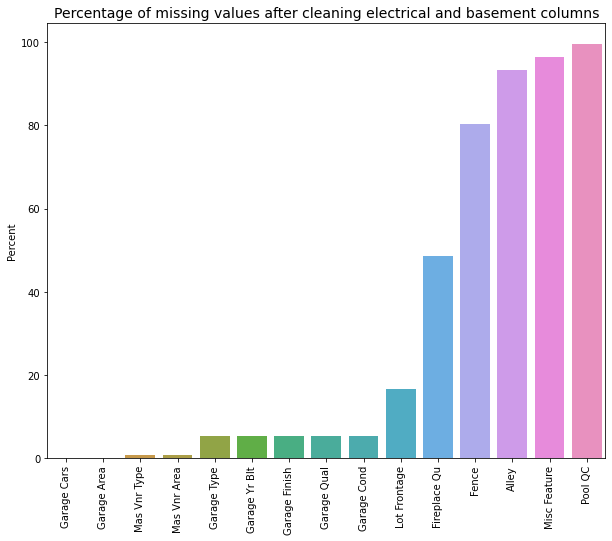

In [19]:
miss_val_percent = percent_missing(df)
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values after cleaning electrical and basement columns", fontsize=14)
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.ylabel("Percent")
plt.xticks(rotation=90);

***
## *Garage values*

### Checking rows with missing values in 'Garage Cars' column.

In [20]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


### We can drop row with missing value.

In [21]:
df = df.dropna(axis=0, subset=['Garage Cars'])

### Garage object column.

In [22]:
grg_str_col = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

### In the description is written that null value in these columns means no garage so we can fill it with 0 or 'none'.

In [23]:
df[grg_str_col] = df[grg_str_col].fillna('None')

### There is only one numerical column.

In [24]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

***
## *Missing values after cleaning Garage values*

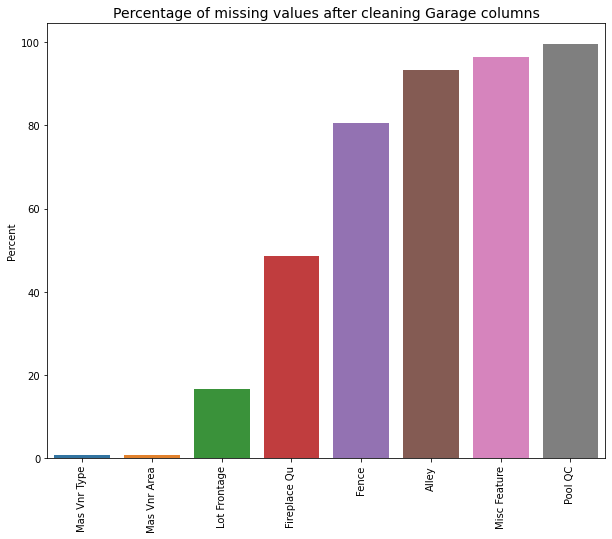

In [25]:
miss_val_percent = percent_missing(df)
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values after cleaning Garage columns", fontsize=14)
plt.ylabel("Percent")
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.xticks(rotation=90);

***
## *Mas Vnr values*

### Based on the Description, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [26]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

***
## *Missing values after filling Mas Vnr columns*

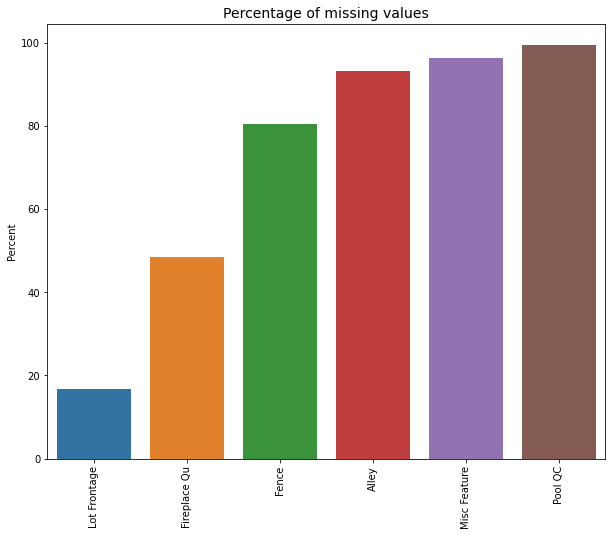

In [27]:
miss_val_percent = percent_missing(df)
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values", fontsize=14)
plt.ylabel("Percent")
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.xticks(rotation=90);

***
## *Dropping useless columns*


### The four columns below have a very large percentage of the missing values, so it is better to delete them instead of filling them in.

In [28]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

***
## *Missing values after dropping useless columns*

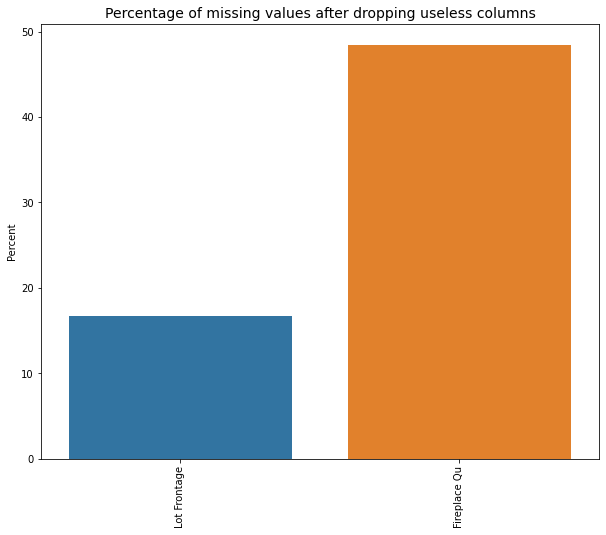

In [29]:
miss_val_percent = percent_missing(df)
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values after dropping useless columns", fontsize=14)
plt.ylabel("Percent")
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.xticks(rotation=90);

***
## *Fireplace Qu column*

### We can simply fill missing values in this column with 'none'.

In [30]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

***
## *Lot Frontage column*

### We will use Neighboorhood column which contains Physical locations within Ames city limits to imput values insted of missing data.

### Checking null values in Lot Frontage column.

In [31]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


### Filling missing data with mean value of Lot Frontage in each Neighboorhood.

In [32]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

### Missing data after filling with mean.

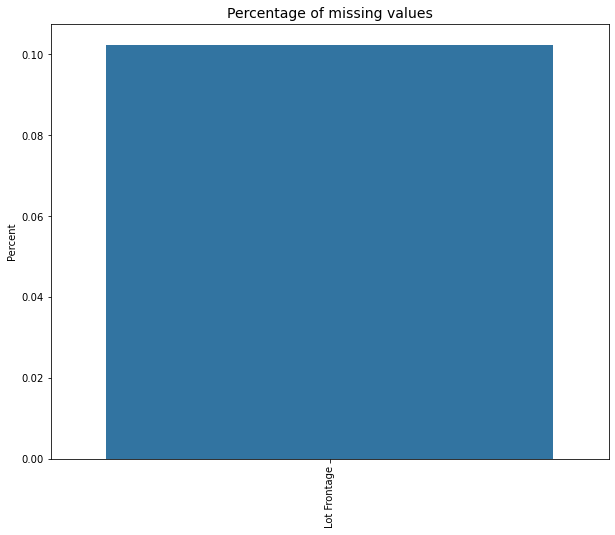

In [33]:
miss_val_percent = percent_missing(df)
plt.figure(figsize=(10,8))
plt.title("Percentage of missing values", fontsize=14)
sns.barplot(x=miss_val_percent.index, y=miss_val_percent)
plt.ylabel("Percent")
plt.xticks(rotation=90);

### There are still some missing values, let's check means.

In [34]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

### Two of Neighborhoods don't have mean value so we can fill it with 0.

In [35]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [36]:
miss_val_percent = percent_missing(df)

In [37]:
miss_val_percent

Series([], dtype: float64)

***
## 3. Dealing with Outliers

### Checking correlation between columns.

In [38]:
df.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128629
Kitchen AbvGr     -0.119857
Overall Cond      -0.101686
MS SubClass       -0.085031
Low Qual Fin SF   -0.037680
Bsmt Half Bath    -0.035864
Yr Sold           -0.030640
Misc Val          -0.015708
BsmtFin SF 2       0.005964
3Ssn Porch         0.032207
Mo Sold            0.035093
Pool Area          0.068394
Screen Porch       0.112105
Bedroom AbvGr      0.143952
Bsmt Unf SF        0.183233
Garage Yr Blt      0.253709
Lot Area           0.266537
2nd Flr SF         0.269685
Bsmt Full Bath     0.275742
Half Bath          0.285140
Open Porch SF      0.312882
Wood Deck SF       0.327259
Lot Frontage       0.348445
BsmtFin SF 1       0.433208
Fireplaces         0.474540
TotRms AbvGrd      0.495490
Mas Vnr Area       0.502161
Year Remod/Add     0.533295
Full Bath          0.545879
Year Built         0.558672
1st Flr SF         0.621711
Total Bsmt SF      0.632673
Garage Area        0.640397
Garage Cars        0.647908
Gr Liv Area        0.706927
Overall Qual       0

### We see that Overall Quality has the biggest correlation with sale price.

<AxesSubplot:title={'center':'Correlation between Sale Price and Overall Quality'}, xlabel='Overall Qual', ylabel='SalePrice'>

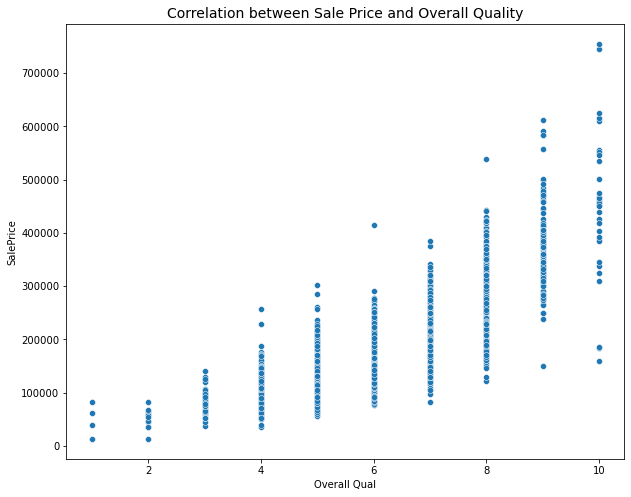

In [39]:
plt.figure(figsize=(10,8))
plt.title("Correlation between Sale Price and Overall Quality", fontsize=14)
sns.scatterplot(y='SalePrice', x='Overall Qual', data=df)

### Three values in bottom right corner stand out from the rest.

In [40]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200_000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,60,RL,72.0,24572,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,16,0,0,0,0,6,2008,WD,Family,150000
1498,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


## Second feature with the biggest correlation is Gr Liv Area.

<AxesSubplot:title={'center':'Correlation between Sale Price and Ground Living Area'}, xlabel='Gr Liv Area', ylabel='SalePrice'>

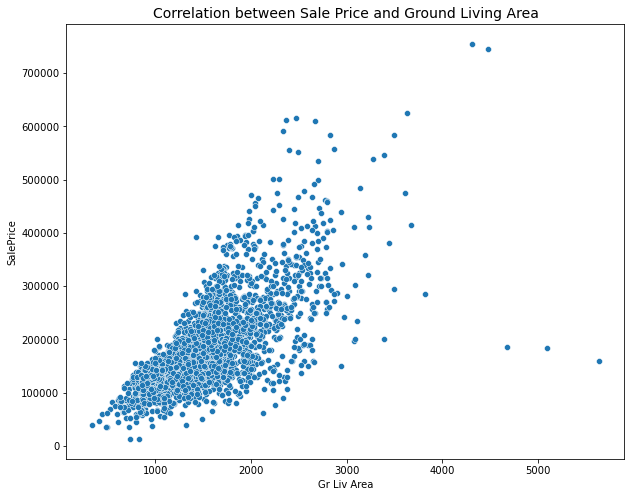

In [41]:
plt.figure(figsize=(10,8))
plt.title("Correlation between Sale Price and Ground Living Area", fontsize=14)
sns.scatterplot(x="Gr Liv Area", y='SalePrice', data=df)

### These are our three outliers.

In [42]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 230_000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
2180,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,17000,10,2007,New,Partial,183850
2181,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


### Deleting outliers.

In [43]:
df = df.drop(df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 230_000)].index)

### Scatterplot Sale Price vs Overall Quality, after deleting outliers.

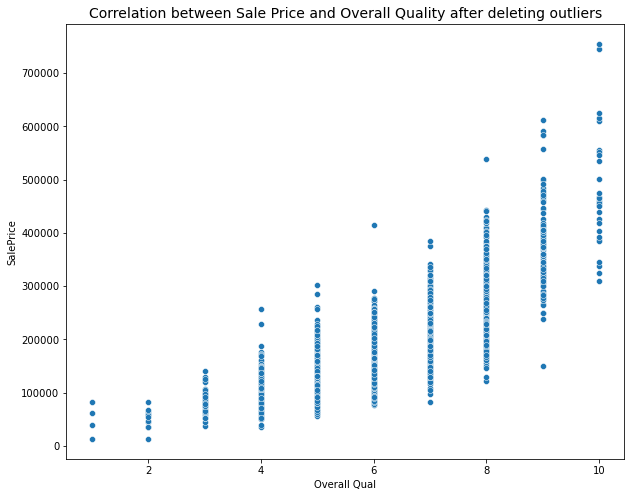

In [44]:
plt.figure(figsize=(10,8))
plt.title("Correlation between Sale Price and Overall Quality after deleting outliers", fontsize=14)
sns.scatterplot(y='SalePrice', x='Overall Qual', data=df);

### Scatterplot Sale Price vs Gr Liv Area , after deleting outliers.

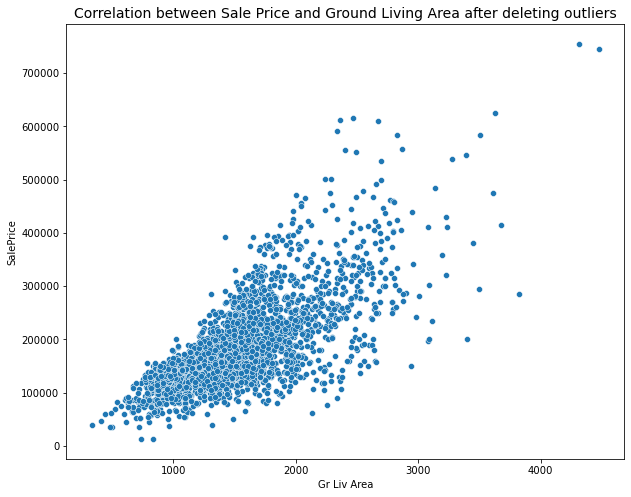

In [45]:
plt.figure(figsize=(10,8))
plt.title("Correlation between Sale Price and Ground Living Area after deleting outliers", fontsize=14)
sns.scatterplot(x="Gr Liv Area", y='SalePrice', data=df);

***
## 4. Dealing with categorical data

### Changing MS Subclass column from numerical to categorical beacause it is number code per class.

In [46]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

### Dividing DataFrame on numerical and object columns.

In [47]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

### Numercial columns info.

In [48]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

### Object columns info.

In [49]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

### Creating 'dummy variables' from object columns.

In [50]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

### Concatenating new object DataFrame with numerical DataFrame.

In [51]:
final_df = pd.concat([df_nums,df_objs],axis=1)

***
## 5. Exporting final DataFrame to csv file

In [52]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [53]:
final_df.to_csv('Ames_final_data.csv', index=False)